# Visualizing SMPS Data using the py-smps library


The Scanning Mobility Particle Sizer (SMPS) is a high resolution particle sizer that is commonly used in research for characterizing the size distribution of aerosols.

This py-smps python library is a simple way to read in the data, analyze it, and visualize it. A loader (`smps.io.load_file`) can be used to import the data from the SMPS, and two plotting functions are available (`smps.plots.heatmap`, `smps.plots.histplot`).

Below is a quick tutorial to show how to import the data, look at it, and plot it. Any bugs with the software can be [reported on github](https://github.com/dhhagan/py-smps/issues).

## Requirements

I personally recommend using python3 and heavily leaning on seaborn for visualization help. There are three required packages for this library:

  * [pandas](http://pandas.pydata.org/)
  * [numpy](http://www.numpy.org/)
  * [seaborn](http://seaborn.pydata.org/api.html)


## Data

To make the process seamless, I recommend exporting your data from the SMPS with the settings in **column** format with a **',' delimiter**. For units, using **dN/dlogDp** is preferred, as it is the natural format for aerosol distributions. I have made available an ambient dataset which is available [here](https://github.com/dhhagan/py-smps/tree/master/sample-data).

## Visualization

The beautification of plots is aided by using [seaborn][1]. For more information, check out their documentation! It's great.


[1]: https://seaborn.pydata.org/index.html

## Import the Library

In [1]:
import smps
import seaborn as sns
import os
import matplotlib
import matplotlib.pyplot as plt
import json

%matplotlib inline

# You can use seaborn to easily control how your plots appear
sns.set('notebook', style='ticks', font_scale=1.5, palette='dark')

print ("smps v{}".format(smps.__version__))
print ("seaborn v{}".format(sns.__version__))
print ("matplotlib v{}".format(matplotlib.__version__))

smps v0.8.1
seaborn v0.9.0
matplotlib v3.0.0


## Load the Data into an SMPS object

The SMPS loader (`smps.io.load_file`) returns an `SMPS` object which has several attributes including:

  * `SMPS.raw`
  * `SMPS.df`
  * `SMPS.meta`
  * `SMPS.bins`
  * `SMPS.midpoints`
  * `SMPS.bin_labels`
  * `SMPS.histogram`
  
### `smps.io.load_file(fpath, column=True, **kwargs)`

#### Arguments

  * `fpath`: File Path for the data
  * `column`: If your data is in 'column' format, set True. Otherwise, set False

In [2]:
bos = smps.io.load_sample("boston")

ConnectionError: HTTPSConnectionPool(host='raw.githubusercontent.com', port=443): Max retries exceeded with url: /dhhagan/py-smps/master/sample-data/boston_wintertime.txt (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x11ee70c88>: Failed to establish a new connection: [Errno 8] nodename nor servname provided, or not known',))

### Explore the SMPS Object


Let's take a look at the SMPS object that was returned by the loader. 

#### `SMPS.meta`

The `SMPS.meta` attribute contains the meta information that was held in the SMPS text file. It is returned as a python dictionary.

In [7]:
print (json.dumps(bos.meta, indent=4))

{
    "Sample File": "C:\\Users\\Marduk\\Documents\\SMPS_data\\r20161122_SMPS.6.7.S80",
    "Classifier Model": "3080",
    "DMA Model": "3081",
    "DMA Inner Radius(cm)": "0.00937",
    "DMA Outer Radius(cm)": "0.01961",
    "DMA Characteristic Length(cm)": "0.44369",
    "CPC Model": "3775 Low Flow",
    "Gas Viscosity (kg/(m*s))": "1.822e-005",
    "Mean Free Path (m)": "6.642e-008",
    "Channels/Decade": "64",
    "Multiple Charge Correction": "FALSE",
    "Nanoparticle Aggregate Mobility Analysis": "FALSE",
    "Diffusion Correction": "FALSE",
    "Units": "dw/dlogDp",
    "Weight": "Number"
}


#### `SMPS.bins` and `SMPS.midpoints`

`SMPS.bins` is an nx3 array that contains the left, middle, and right side of each bin in the dataset. `SMPS.midpoints` is simply the center column of bins. **NOTE: All diameters are expected to be in nm. This can be changed by altering the `dp_units` argument. All diameters are then promptly converted to microns.**

In [8]:
# print out the first 4 bins
bos.bins[0:4]

array([[0.0212875, 0.0217   , 0.0220673],
       [0.0220673, 0.0225   , 0.0228757],
       [0.0228757, 0.0233   , 0.0237137],
       [0.0237137, 0.0241   , 0.0245824]])

In [9]:
# print out the midpoints
bos.midpoints

array([0.0217, 0.0225, 0.0233, 0.0241, 0.025 , 0.0259, 0.0269, 0.0279,
       0.0289, 0.03  , 0.0311, 0.0322, 0.0334, 0.0346, 0.0359, 0.0372,
       0.0385, 0.04  , 0.0414, 0.0429, 0.0445, 0.0461, 0.0478, 0.0496,
       0.0514, 0.0533, 0.0552, 0.0573, 0.0594, 0.0615, 0.0638, 0.0661,
       0.0685, 0.071 , 0.0737, 0.0764, 0.0791, 0.082 , 0.0851, 0.0882,
       0.0914, 0.0947, 0.0982, 0.1018, 0.1055, 0.1094, 0.1134, 0.1176,
       0.1219, 0.1263, 0.131 , 0.1358, 0.1407, 0.1459, 0.1512, 0.1568,
       0.1625, 0.1685, 0.1747, 0.1811, 0.1877, 0.1946, 0.2017, 0.2091,
       0.2167, 0.2247, 0.2329, 0.2414, 0.2503, 0.2595, 0.269 , 0.2788,
       0.289 , 0.2996, 0.3106, 0.322 , 0.3338, 0.346 , 0.3587, 0.3718,
       0.3854, 0.3995, 0.4142, 0.4294, 0.4451, 0.4614, 0.4783, 0.4958,
       0.514 , 0.5328, 0.5523, 0.5725, 0.5935, 0.6153, 0.6378, 0.6612,
       0.6854, 0.7105, 0.7365, 0.7635, 0.7915, 0.8205, 0.8505, 0.8817,
       0.914 , 0.9475, 0.9822])

#### `SMPS.histogram` and `SMPS.raw`

`SMPS.histogram` contains the histogram as a pandas DataFrame. The index is a timeseries and can easily be manipulated. `SMPS.raw` contains both the histogram and all aditional information that the SMPS records including means, modes, etc. It also is a pandas DataFrame.

In [10]:
# Display the first few rows of the DataFrame
bos.raw.head(3)

,Sample #,Date,Start Time,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,Status Flag,td,tf,D50,Median,Mean,GM,Mode,GSD,Total Conc.
2016-11-22 15:20:48,1,11/22/16,15:20:48,938.332,1581.720,1219.210,1795.380,1216.890,1670.140,908.874,...,Normal Scan,2.93,12.4094,1000,40.5183,66.2331,50.1490,24.1442,1.97913,697.18
2016-11-22 15:23:20,2,11/22/16,15:23:20,374.100,234.678,254.937,422.669,372.819,541.616,657.469,...,Normal Scan,2.93,12.4094,1000,61.8646,70.9645,64.1694,61.5265,1.52780,5865.59
2016-11-22 15:25:50,3,11/22/16,15:25:50,5552.500,3805.570,3505.620,4527.480,4050.570,3430.330,3077.630,...,Normal Scan,2.93,12.4094,1000,41.4080,61.8417,48.9025,21.6739,1.90589,1913.93


#### `SMPS.stats`

`SMPS.stats` contains the statistics generated by the SMPS.

In [11]:
bos.scan_stats.head()

,Scans Per Sample,Start Time,Lower Size,Down Scan First,Status Flag,GM,Sample #,Median,Sheath Flow,CPC Sample Flow,...,Impactor Type,D50,td,Date,Scan Up Time,CPC Inlet Flow(lpm),Mean,Aerosol Flow,Upper Size,High Voltage
2016-11-22 15:20:48,1,15:20:48,21.2875,False,Normal Scan,50.1490,1,40.5183,1.7,0.3,...,None,1000,2.93,11/22/16,120,0.3,66.2331,0.3,1000,9735
2016-11-22 15:23:20,1,15:23:20,21.2875,False,Normal Scan,64.1694,2,61.8646,1.7,0.3,...,None,1000,2.93,11/22/16,120,0.3,70.9645,0.3,1000,9735
2016-11-22 15:25:50,1,15:25:50,21.2875,False,Normal Scan,48.9025,3,41.4080,1.7,0.3,...,None,1000,2.93,11/22/16,120,0.3,61.8417,0.3,1000,9735
2016-11-22 15:28:20,1,15:28:20,21.2875,False,Normal Scan,43.8908,4,35.0935,1.7,0.3,...,None,1000,2.93,11/22/16,120,0.3,55.3576,0.3,1000,9735
2016-11-22 15:30:49,1,15:30:49,21.2875,False,Normal Scan,55.6291,5,54.8718,1.7,0.3,...,None,1000,2.93,11/22/16,120,0.3,69.3677,0.3,1000,9735


We can go ahead and resample the data by mean if we would like to! Under the hood, this method splits the raw dataframe into numeric and non-numeric columns before resampling by mean the numeric columns and the non-numerics by 'first'. If `inplace=True`, then it will save the resampled data and replace the current raw dataframe. Otherwise, it will return a copy of the object.

In [12]:
bos.resample("5min", inplace=True)

bos.raw.head(3)

,Sample #,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,...,Median,Mean,GM,Mode,GSD,Total Conc.,Date,Start Time,Impactor Type,Status Flag
2016-11-22 15:20:00,1.5,656.2160,908.1990,737.0735,1109.0245,794.8545,1105.8780,783.1715,1275.732,1144.5050,...,51.19145,68.59880,57.15920,42.83535,1.753465,3281.385,11/22/16,15:20:48,None,Normal Scan
2016-11-22 15:25:00,3.5,5025.4750,3542.6750,3495.1700,3674.2750,3541.0800,3384.4750,3200.3750,2985.765,2390.5950,...,38.25075,58.59965,46.39665,21.67390,1.891495,1521.435,11/22/16,15:25:50,None,Normal Scan
2016-11-22 15:30:00,5.5,1323.2865,1281.7545,1218.1965,1145.7940,1089.3235,1052.0015,846.4660,846.964,816.1545,...,55.81775,75.35480,59.27410,33.09090,1.924750,746.581,11/22/16,15:30:49,None,Normal Scan


## Visualization

Okay. All we really want to do is visualize our data, right? Two common plots are a heatmap-like plot (`smps.plots.heatmap`) and a particle size distribution (`smps.plots.histplot`).

Here, we show how to use both of them. Each one returns a matplotlib axis object which can easily be manipulated as you would any other matplotlib object. This makes it easy to alter how they look, add lables, etc.

### `smps.plots.heatmap(X, Y, Z, ax=None, kind='log', cbar=True, cmap=default_cmap, fig_kws=None, cbar_kws=None, **kwargs)`


Okay, so all you really need to do to plot the heatmap is give it your X, Y, and Z data:

  * `X`: Time Axis
  * `Y`: Bin midpoints
  * `Z`: Data (usually in the format of $dN/dlogD_p$)
  
You may think the default colormap is not ideal (it probably isn't), so you can easily change it by feeding it any valid matplotlib colormap object. You can read more about those [here](http://matplotlib.org/users/colormaps.html) or [here](http://seaborn.pydata.org/tutorial/color_palettes.html).

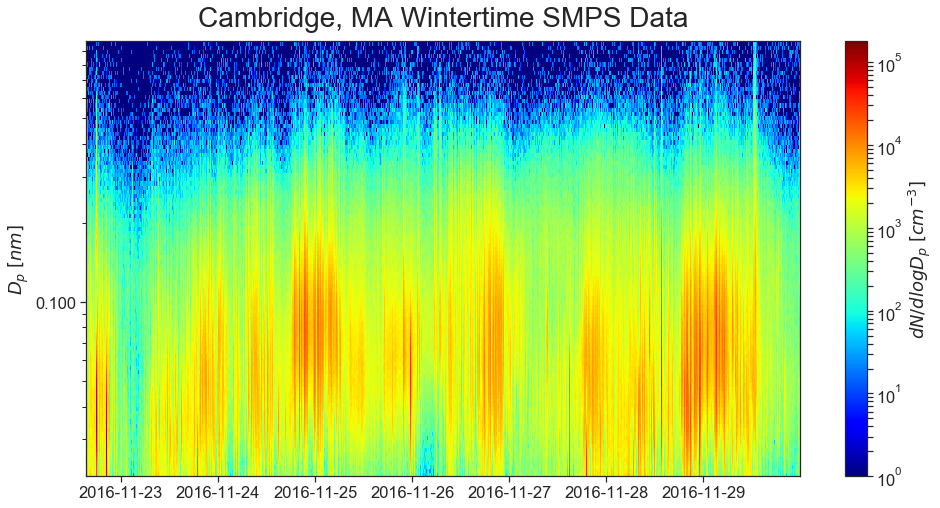

In [13]:
X = bos.dndlogdp.index
Y = bos.midpoints
Z = bos.dndlogdp.T.values

ax = smps.plots.heatmap(X, Y, Z, cmap='jet')

# Go ahead and change things!
ax.set_title("Cambridge, MA Wintertime SMPS Data", y=1.02, fontsize=28);

### `smps.plots.histplot(histogram, bins, ax=None, plot_kws=None, fig_kws=None, **kwargs)`


To plot a histogram, you need to provide two pieces of information:

  * `histogram`: Your histogram data! You can provide it as an array, or as a DataFrame (it will be averaged out)
  * `bins`: Bin midpoints
  
There are plenty of ways to customize these plots. You can provide additional keyword arguments for the matplotlib bar chart (`plot_kws`) or the figure itself (`fig_kws`). You can also plot on an existing axis by providing that argument.

### Example 1

Let's make a basic histogram depicting the particle size distribution over the entire dataset.

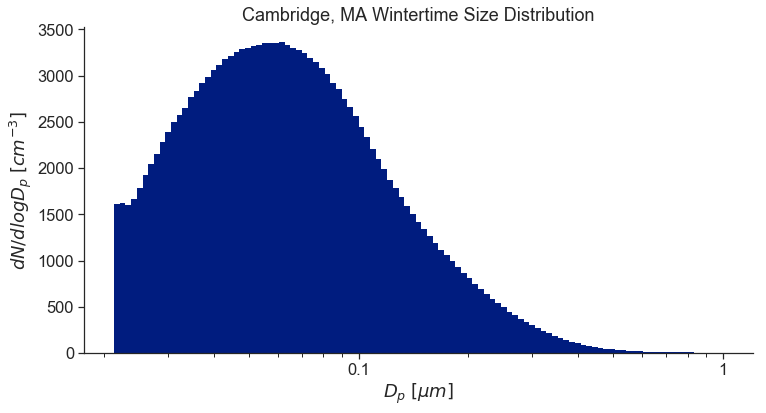

In [14]:
ax = smps.plots.histplot(bos.dndlogdp, bos.bins, plot_kws={'linewidth': .01}, fig_kws=dict(figsize=(12,6)))

ax.set_title("Cambridge, MA Wintertime Size Distribution")
ax.set_ylabel("$dN/dlogD_p \; [cm^{-3}]$")

sns.despine()

### Example 2

Let's plot two seperate days and make them slightly transparent. Let's also go ahead and get rid of the linewidth on the individual bars.

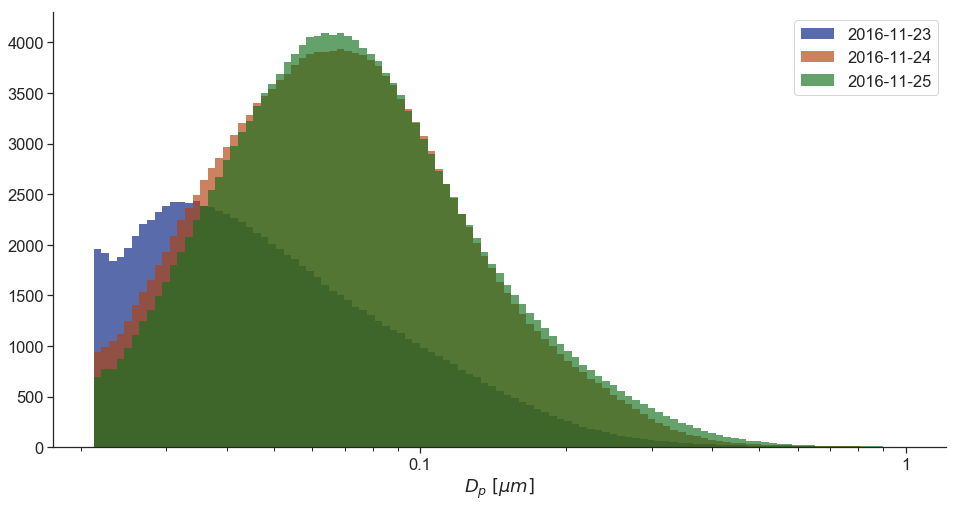

In [15]:
dates = ["2016-11-23", "2016-11-24", "2016-11-25"]

ax = None

for i, date in enumerate(dates):
    color = sns.color_palette()[i]
    plot_kws = dict(alpha=0.65, color=color, linewidth=0.)
    
    ax = smps.plots.histplot(bos.dndlogdp[date], bos.bins, ax=ax, plot_kws=plot_kws)
    
# Add us a legend!
ax.legend(dates, loc='best')

# Remove the spines
sns.despine()